In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

In [ ]:
# import pandas as pd
# newtestdata = pd.read_csv('/content/sample_data/test_filtered_True_False.csv')

In [ ]:
# newtestdata['Label'] = newtestdata['Label'].astype(int)
# print(newtestdata.head)

<bound method NDFrame.head of     Label                                               Text
0       0  Says Vice President Joe Biden "admits that the...
1       1  Active duty males in the military are twice as...
2       1  Texas families have kept more than $10 billion...
3       0  Says bag litter increased after San Francisco ...
4       1  Across the country, $174 billion of the Recove...
..    ...                                                ...
59      0  The American Conservative Union gives [Rep. Ti...
60      0  Says U.S. Sen Sherrod Brown promised that the ...
61      0         McCain Trying to Have it Both Ways on Iraq
62      0  Says President Obamas new immigration plan is ...
63      1       Nearly 20% of our residents are born abroad.

[64 rows x 2 columns]>


In [ ]:
%cd /content/drive/MyDrive/FakeNewsDetectionDataset

/content/drive/MyDrive/FakeNewsDetectionDataset


In [ ]:


train_data = pd.read_csv("liar_dataset/train.tsv", delimiter='\t')
valid_data = pd.read_csv("liar_dataset/valid.tsv", delimiter='\t')
test_data = pd.read_csv("liar_dataset/test.tsv", delimiter='\t')

In [ ]:
print(train_data.head(5))

    2635.json        false  \
0  10540.json    half-true   
1    324.json  mostly-true   
2   1123.json        false   
3   9028.json    half-true   
4  12465.json         true   

  Says the Annies List political group supports third-trimester abortions on demand.  \
0  When did the decline of coal start? It started...                                   
1  Hillary Clinton agrees with John McCain "by vo...                                   
2  Health care reform legislation is likely to ma...                                   
3  The economic turnaround started at the end of ...                                   
4  The Chicago Bears have had more starting quart...                                   

                             abortion    dwayne-bohac  \
0  energy,history,job-accomplishments  scott-surovell   
1                      foreign-policy    barack-obama   
2                         health-care    blog-posting   
3                        economy,jobs   charlie-crist   
4    

In [ ]:
#Taking text and label columns
train_data = train_data.iloc[:, [1, 2]]
test_data = test_data.iloc[:, [1, 2]]
valid_data = valid_data.iloc[:, [1, 2]]

In [ ]:
train_data.columns = ['Label', 'Text']
test_data.columns = ['Label', 'Text']
valid_data.columns = ['Label', 'Text']

In [ ]:
#keeping 'true', 'false', 'mostly-true', 'barely-true' labels
labels_to_keep = ['true', 'false', 'mostly-true', 'barely-true']

train_data = train_data[train_data['Label'].isin(labels_to_keep)]
test_data = test_data[test_data['Label'].isin(labels_to_keep)]
valid_data = valid_data[valid_data['Label'].isin(labels_to_keep)]

In [ ]:

print(train_data.head)
print(test_data.shape)
print(valid_data.shape)

<bound method NDFrame.head of              Label                                               Text
1      mostly-true  Hillary Clinton agrees with John McCain "by vo...
2            false  Health care reform legislation is likely to ma...
4             true  The Chicago Bears have had more starting quart...
5      barely-true  Jim Dunnam has not lived in the district he re...
8      mostly-true  Says GOP primary opponents Glenn Grothman and ...
...            ...                                                ...
10228  mostly-true   Mike Trainor...still owes $250,000 to the state.
10229  barely-true  The Supreme Courts views are radically out of ...
10234  mostly-true  There are a larger number of shark attacks in ...
10235  mostly-true  Democrats have now become the party of the [At...
10237        false  On lifting the U.S. Cuban embargo and allowing...

[7286 rows x 2 columns]>
(909, 2)
(919, 2)


In [ ]:
#combining train and valid data
train_dataset = train_data.append(valid_data)
print(train_dataset.shape)



(8205, 2)


<ipython-input-13-8951a09a7636>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_data.append(valid_data)


In [ ]:
#converting mostly-true to true and barely-true to false label
train_dataset['Label'] = train_dataset['Label'].replace({'mostly-true': 'true', 'barely-true': 'false'})
print(train_dataset.head)

<bound method NDFrame.head of       Label                                               Text
1      true  Hillary Clinton agrees with John McCain "by vo...
2     false  Health care reform legislation is likely to ma...
4      true  The Chicago Bears have had more starting quart...
5     false  Jim Dunnam has not lived in the district he re...
8      true  Says GOP primary opponents Glenn Grothman and ...
...     ...                                                ...
1275  false  Says U.S. Rep. Charles Bass wants to privatize...
1279   true  Says Donald Trump has bankrupted his companies...
1280   true  John McCain and George Bush have "absolutely n...
1281  false  A new poll shows 62 percent support the presid...
1282  false  No one claims the report vindicating New Jerse...

[8205 rows x 2 columns]>


In [ ]:
#converting false to 0 and 1 to true
train_dataset['Label'] = pd.get_dummies(train_dataset.Label)['true']
test_data['Label'] = pd.get_dummies(test_data.Label)['true']
# valid_data['Label'] = pd.get_dummies(valid_data.Label)['false']

In [ ]:
print(train_dataset.head(3))
# print(test_data.head)
# print(valid_data.head)

   Label                                               Text
1      1  Hillary Clinton agrees with John McCain "by vo...
2      0  Health care reform legislation is likely to ma...
4      1  The Chicago Bears have had more starting quart...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and validation sets (80% train, 20% test)

X_train, X_valid, y_train, y_valid = train_test_split(train_dataset['Text'], train_dataset['Label'], test_size=0.2, random_state=42)

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Prepare data for SVM
vectorizer = TfidfVectorizer(max_features=5000)
train_features_svm = vectorizer.fit_transform(X_train)
test_features_svm = vectorizer.transform(newtestdata['Text'])
#test_features_svm = vectorizer.transform(test_data['Text'])

# Train SVM model
svm_model = make_pipeline(SVC(kernel='linear'))
svm_model.fit(train_features_svm, y_train)

# Predict using SVM
svm_preds = svm_model.predict(test_features_svm)

# Evaluate SVM
print("SVM Classification Report:")
#print(classification_report(test_data['Label'], svm_preds))
print(classification_report(newtestdata['Label'], svm_preds))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        39
           1       0.58      0.84      0.69        25

    accuracy                           0.70        64
   macro avg       0.72      0.73      0.70        64
weighted avg       0.75      0.70      0.71        64



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Prepare data for Decision Tree
vectorizer_dt = TfidfVectorizer(max_features=5000)
train_features_dt = vectorizer_dt.fit_transform(X_train)
test_features_dt = vectorizer_dt.transform(newtestdata['Text'])
#test_features_dt = vectorizer_dt.transform(test_data['Text'])

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(train_features_dt, y_train)

# Predict using Decision Tree
dt_preds = dt_model.predict(test_features_dt)

# Evaluate Decision Tree
print("\nDecision Tree Classification Report:")
#print(classification_report(test_data['Label'], dt_preds))
print(classification_report(newtestdata['Label'], dt_preds))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.48      0.56      0.52        25

    accuracy                           0.59        64
   macro avg       0.58      0.59      0.58        64
weighted avg       0.61      0.59      0.60        64



In [ ]:
!pip install transformers


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.0 MB/s 

In [ ]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
device = torch.device('cuda')

In [ ]:

bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Text(0.5, 0, 'Number of texts')

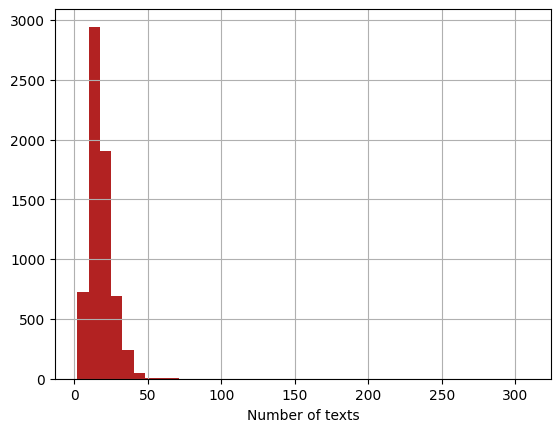

In [ ]:
seq_len = [len(title.split()) for title in X_train]
pd.Series(seq_len).hist(bins = 40, color='firebrick')
plt.xlabel('Number of words')
plt.xlabel('Number of texts')

In [ ]:
MAX_LENGTH = 25
tokens_train = tokenizer.batch_encode_plus(X_train.tolist(), max_length=MAX_LENGTH,
                                           pad_to_max_length=True, truncation=True)
tokens_test = tokenizer.batch_encode_plus(test_data['Text'].tolist(), max_length=MAX_LENGTH,
                                           pad_to_max_length=True, truncation=True)
tokens_val = tokenizer.batch_encode_plus(X_valid.tolist(), max_length=MAX_LENGTH,
                                           pad_to_max_length=True, truncation=True)


In [ ]:
train_label = y_train
test_label = test_data['Label']
val_label = y_valid

In [ ]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_label.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_label.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_label.tolist())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataset = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(X_train)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

val_dataset = TensorDataset(val_seq, val_mask, val_y)
val_sampler = RandomSampler(X_valid)
val_dataloader = DataLoader(val_dataset, sampler=val_sampler, batch_size=batch_size)

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

In [ ]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    206.
  Batch   100  of    206.
  Batch   150  of    206.
  Batch   200  of    206.

Evaluating...
  Batch    50  of     52.

Training Loss: 0.672
Validation Loss: 0.660

 Epoch 2 / 2
  Batch    50  of    206.
  Batch   100  of    206.
  Batch   150  of    206.
  Batch   200  of    206.

Evaluating...
  Batch    50  of     52.

Training Loss: 0.634
Validation Loss: 0.665


In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68       702
           1       0.30      0.61      0.40       207

    accuracy                           0.59       909
   macro avg       0.57      0.60      0.54       909
weighted avg       0.71      0.59      0.62       909

